# PyMongo Assignment

in this Notebook, the basics of Pymongo will be introduced. To get started, please visit https://www.mongodb.org/ and install the appropriate version of mongodb.

the following is contained within this doc:

1. Simulate a dataset, using the regression methods we covered in the previous
lectures, which contains data of 10.000 houses. The data should contain the
number of square feet, the number of rooms, an (incremental) ID for the house,
and the price (the latter of which you simulate by making a model that predict
prices based on the square feet and the number of rooms.

2. Store the data in MongoDB: how do you do it and why?

3. Add a short description to 3 of the houses

4. select all houses that have a description

### Simulate a dataset

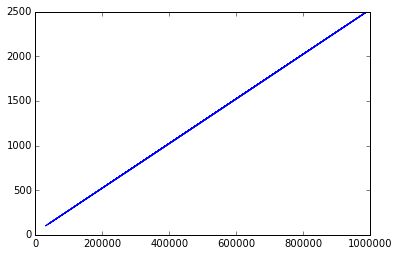

In [1]:
import numpy as np
import pymongo
import matplotlib.pyplot as plt
%matplotlib inline


#create dataset
num_feet = np.random.random_integers(100,2500,10000)

num_rooms = np.random.random_integers(2,10,10000)

prices = 400 * num_feet + 25*num_rooms + np.random.normal(0,10000)

plt.plot(prices,num_feet)



### Store the Dataset in MongoDB

we first establish a connection to our database with pymongo.MongoClient(), then insert our data to the Database.
Note that since python 3 (as of 1.1.2016), numpy objects are not permitted in mongo (they were in 2.7), thus the cast to ints and floats.

In [2]:

#Store Simulated Dataset
#establish connection
client = pymongo.MongoClient()
db = client.test_database #db = client['test-database']

collection = db.test_collection

houses = db.houses
house_attributes = zip(num_feet,num_rooms,prices)
attr_list = list(house_attributes) # this is necessary as of python 3 zips can no longer be accessed like lists. Why.
for feet,rooms,price in attr_list:
    #print(feet.type,rooms.type,price)
    house = {"feet" : int(feet),
    "rooms" : int(rooms),
    "price" : float(price)}
    house_id = houses.insert(house)




C:\Users\Trost\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


test

In [3]:
a = houses.find_one()
print(a)



{'_id': ObjectId('568a7911047aa933e44bba1d'), 'price': 780483.9746901597, 'feet': 1940, 'desc': ['cozy'], '_description': 'cozy', 'rooms': 6}


#### Add a short Descriotion to some of the houses:
To do so, we'll find a house that fits the description from our attribute list and add a new datafield "_description", then call .update

In [4]:

#ADD SHORT DESCRIPTION

desc_list = ['cozy','seaside','garden','farm','murder happened here']*2
for i in range(3):

    feet,rooms,price = attr_list[i]

    descr_house = houses.find_one({"feet" : int(feet),
    "rooms" : int(rooms),
    "price" : float(price)})
    ID = descr_house['_id']
    print( 'before')
    print(  houses.find_one({"_id":ID}) )
    #simple use of update
    houses.update({'_id':ID},{"feet" : int(feet),
    "rooms" : int(rooms),
    "price" : float(price),
    "_description":desc_list[i]})
    #use push. Mind the difference: 'desc' is an array of values, while _description is only one value
    houses.update({'_id':ID},{'$push':{'desc':desc_list[i]}})
    print( '\n after')
    print(  houses.find_one({"_id":ID}) )



before
{'_id': ObjectId('568a820d047aa919d4e4f85f'), 'feet': 2450, 'rooms': 6, 'price': 971028.181412725}

 after
{'_id': ObjectId('568a820d047aa919d4e4f85f'), 'price': 971028.181412725, 'feet': 2450, 'desc': ['cozy'], '_description': 'cozy', 'rooms': 6}
before
{'_id': ObjectId('568a820d047aa919d4e4f860'), 'feet': 966, 'rooms': 9, 'price': 377503.18141272507}

 after
{'_id': ObjectId('568a820d047aa919d4e4f860'), 'price': 377503.18141272507, 'feet': 966, 'desc': ['seaside'], '_description': 'seaside', 'rooms': 9}
before
{'_id': ObjectId('568a820d047aa919d4e4f861'), 'feet': 818, 'rooms': 10, 'price': 318328.18141272507}

 after
{'_id': ObjectId('568a820d047aa919d4e4f861'), 'price': 318328.18141272507, 'feet': 818, 'desc': ['garden'], '_description': 'garden', 'rooms': 10}


C:\Users\Trost\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
C:\Users\Trost\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.


###  select all houses that have a description

For this we'll use the "cursor" object

In [5]:
#select all houses that have a description
cursor = houses.find({"desc" : {'$exists':True}})

#count all of them
print(cursor.count())
#print(db.command({'dbstats': 1}))


###find all houses with price higher than X and number of rooms y

x = 100000
y = 4

cursor = houses.find({"price":{"$gt":x}},{"rooms":4})

print(cursor.count())


6
18661
